In [1]:
!pip install tensorflow
!pip show tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 9.2 MB/s 
Name: tensorflow
Version: 2.8.0+zzzcolab20220506162203
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tf-estimator-nightly, six, absl-py, keras, tensorflow-io-gcs-filesystem, numpy, keras-preprocessing, termcolor, flatbuffers, setuptools, google-pasta, libclang, protobuf, opt-einsum, gast, h5py, astunparse, tensorboard, wrapt, typing-extensions, grpcio
Required-by: kapre


In [2]:
!pip install --ignore-installed --upgrade

ERROR: You must give at least one requirement to install (see "pip help install")


In [3]:
!pip install keras



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip show keras

Name: keras
Version: 2.8.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


In [5]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
import tensorflow 
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


# mounting google drive.
from google.colab import drive
drive.mount('/content/gdrive')

#importing drive path.

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG



Mounted at /content/gdrive
/content/gdrive/MyDrive/A survey on Text Extraction from Digital Colour Images using MATLAB.docx
/content/gdrive/MyDrive/ce04ee0d-1827-42ea-88b9-95a6f1e5c648.jpg
/content/gdrive/MyDrive/mansi mathur resume.doc
/content/gdrive/MyDrive/KNN (3).gdoc
/content/gdrive/MyDrive/KNN (2).gdoc
/content/gdrive/MyDrive/KNN (1).gdoc
/content/gdrive/MyDrive/KNN.gdoc
/content/gdrive/MyDrive/Gitanjali Wadhwa cert.pdf
/content/gdrive/MyDrive/MNIST_KNN_LR_SVM_PCA.ipynb
/content/gdrive/MyDrive/90486DDD-864A-4952-803B-41D96A74B101.png
/content/gdrive/MyDrive/EDAS1570675305.docx
/content/gdrive/MyDrive/EDAS1570675305.pptx
/content/gdrive/MyDrive/ICSCSP 2020 Volume 1 proceedings.gdoc
/content/gdrive/MyDrive/archive.zip
/content/gdrive/MyDrive/test_results (90-10) (2).xlsx
/content/gdrive/MyDrive/test_results (90-10) (2).gsheet
/content/gdrive/MyDrive/test_results (90-10) (1).gsheet
/content/gdrive/MyDrive/test_results (90-10) (1).xlsx
/content/gdrive/MyDrive/test_results (90-10).gs

In [8]:
%matplotlib inline
from zipfile import ZipFile
filename = '/content/gdrive/MyDrive/breakhis Dataset/BreaKHis 400X.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  import numpy as np

100%|██████████| 369/369 [00:06<00:00, 53.15it/s]


74850304/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 3842      
                                                         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


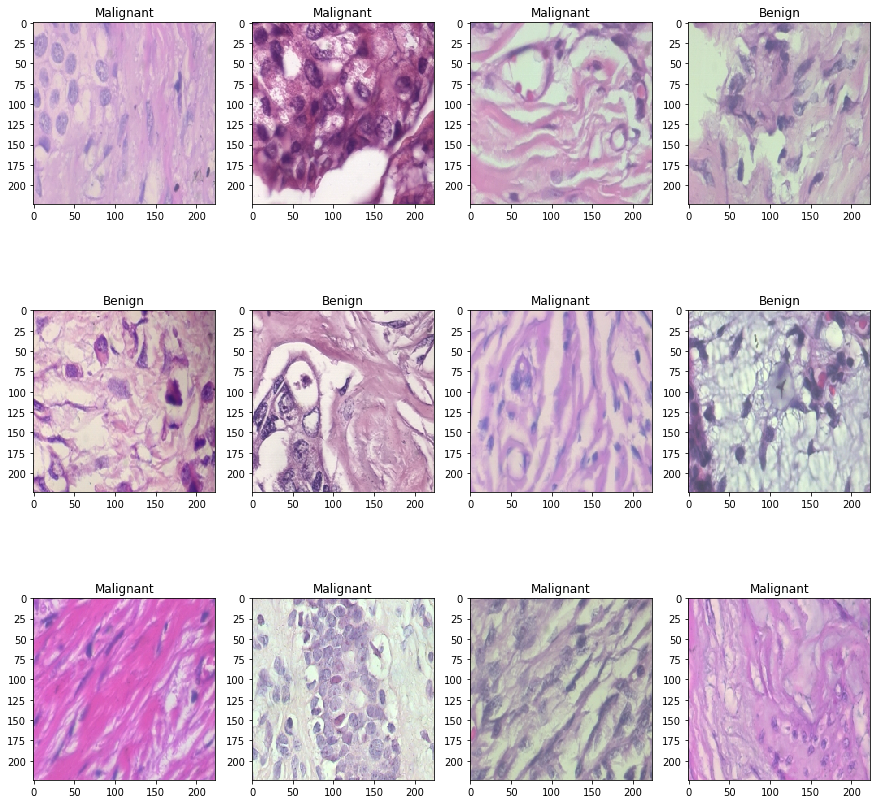

In [9]:
benign_train = np.array(Dataset_loader('/content/BreaKHis 400X/train/benign',224))
malign_train = np.array(Dataset_loader('/content/BreaKHis 400X/train/malignant',224))
benign_test = np.array(Dataset_loader('/content/BreaKHis 400X/test/benign',224))
malign_test = np.array(Dataset_loader('/content/BreaKHis 400X/test/malignant',224))
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
#plt.show()
BATCH_SIZE = 16
# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model
K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


 


model = build_model(resnet ,lr = 1e-4)
model.summary()

In [12]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)
model.load_weights("weights.best.hdf5")

Y_val_pred = model.predict(x_val)
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
58/57 [==============================] - ETA: -11s - loss: 0.5719 - accuracy: 0.7418
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to weights.best.hdf5
57/57 [==============================] - 1144s 19s/step - loss: 0.5719 - accuracy: 0.7418 - val_loss: 0.7593 - val_accuracy: 0.7000 - lr: 1.0000e-04
Epoch 2/20
58/57 [==============================] - ETA: -11s - loss: 0.4422 - accuracy: 0.8344
Epoch 2: val_accuracy improved from 0.70000 to 0.80000, saving model to weights.best.hdf5
57/57 [==============================] - 1114s 19s/step - loss: 0.4422 - accuracy: 0.8344 - val_loss: 0.4462 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 3/20
58/57 [==============================] - ETA: -11s - loss: 0.3845 - accuracy: 0.8638
Epoch 3: val_accuracy improved from 0.80000 to 0.91739, saving model to weights.best.hdf5
57/57 [==============================] - 1122s 20s/step - loss: 0.3845 - accuracy: 0.8638 - val_loss: 0.2498 - val_accuracy: 0.9174 - lr: 1.0000e-0

0.9608695652173913

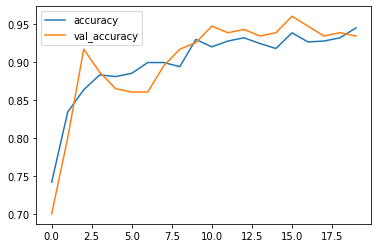

In [16]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

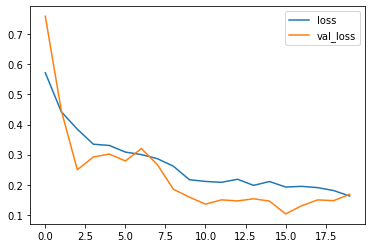

In [15]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()


In [17]:
model.load_weights("weights.best.hdf5")

Y_val_pred = model.predict(x_val)
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

0.9608695652173913

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys
100%|██████████| 10/10 [22:53<00:00, 137.38s/it]


Confusion matrix, without normalization
[[161  15]
 [  8 361]]


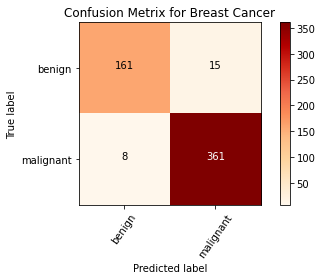

In [18]:
Y_pred = model.predict(X_test)
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='OrRd')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Breast Cancer')


Confusion matrix, without normalization
[[161  15]
 [  7 362]]


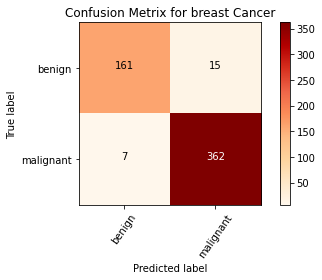

In [20]:
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for breast Cancer')

In [21]:
from sklearn.metrics import classification_report
classification_report( np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))

'              precision    recall  f1-score   support\n\n           0       0.96      0.91      0.94       176\n           1       0.96      0.98      0.97       369\n\n    accuracy                           0.96       545\n   macro avg       0.96      0.95      0.95       545\nweighted avg       0.96      0.96      0.96       545\n'

Accuracy = 96.08%

---
Precision = 0.91

---
Recall = 0.94

---
F1-score = 0.97









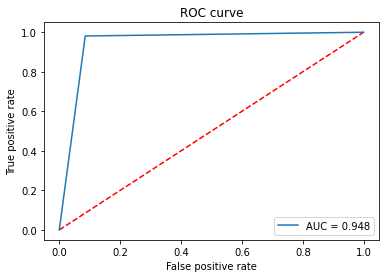

In [22]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

ROC-AUC = 0.948

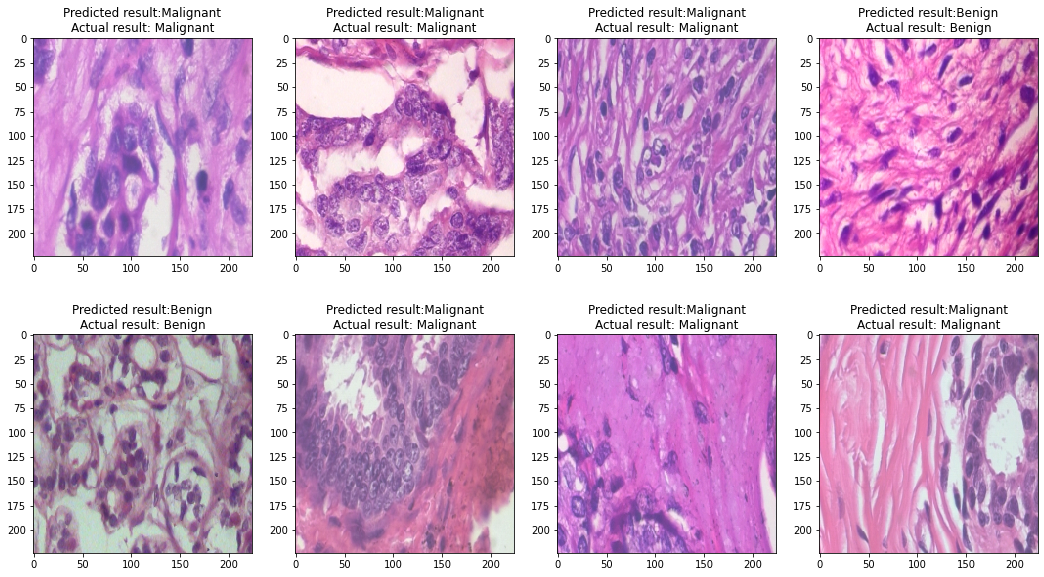

In [23]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y_test)):
    if(np.argmax(Y_test[i])==np.argmax(Y_pred_tta[i])):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(Y_test)):
    if(not np.argmax(Y_test[i])==np.argmax(Y_pred_tta[i])):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# # Display first 8 random images
w=60
h=40
fig=plt.figure(figsize=(18, 10))
columns = 4
rows = 2

def Transfername(namecode):
    if namecode==0:
        return "Benign"
    else:
        return "Malignant"
    
for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ Transfername(np.argmax(Y_pred_tta[prop_class[i]]))
                       +"\n"+"Actual result: "+ Transfername(np.argmax(Y_test[prop_class[i]])))
    plt.imshow(X_test[prop_class[i]], interpolation='nearest')
plt.show()